In [64]:
# Group 29
# Assignment 3 | Author: Yash Kumar Sahu | Roll No: CED19I039 
# Assignment 3 | Author: Radhika Mittal | Roll No: CED19I050
# Assignment 3 | Author: Deep Patel | Roll No: ME21D0004

## Libraries


In [65]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math


## Initialization

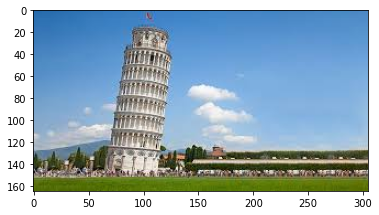

In [66]:
## 30 deg = PI/6 rad
## rotating counter clockwise, so it's negative relative to Cartesian quadrants
cnAngle = math.radians(9)
cwd = os.getcwd()                                            # get current directory
img_s= cv2.imread(cwd+"/PISA.jpg") 
plt.imshow(img_s[:, :, ::-1])


In [67]:
img_d=img_s*0 ## blank destination image size template
img_d_width=img_d.shape[1]
img_d_height=img_d.shape[0]
img_d_centre_X=img_d_width/2
img_d_centre_Y=img_d_height/2
fDistance=0
fPolarAngle=0
print(img_d.shape)

(165, 305, 3)


## Image rotation Throwing values from source to destination

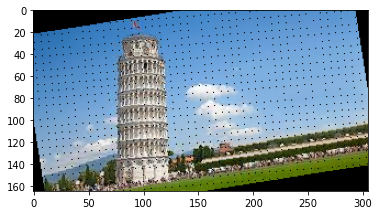

In [68]:
for i in range(img_d_height):  # scan across row or height
    for j in range(img_d_width): # scan across col or weidth
        ## convert raster to Cartesian
        x = j - img_d_centre_X
        y = img_d_centre_Y - i
        ## convert Cartesian to polar
        fDistance = math.sqrt(x * x + y * y)
        fPolarAngle = 0.0
        if (x == 0):
        
            if (y == 0):
                ## centre of image, no rotation needed
                img_d[i,j]=img_s[i,j]
                continue
        
            elif (y < 0):
            
                fPolarAngle = 1.5 * math.PI
            
            else:
            
                fPolarAngle = 0.5 * math.PI
        else:
            fPolarAngle = math.atan2(y,x)  
        
        fPolarAngle += cnAngle
        x = round(fDistance * math.cos(fPolarAngle))
        y = round(fDistance * math.sin(fPolarAngle))
        
        x = x + img_d_centre_X
        y = img_d_centre_Y - y

        if ((x < 0) or (x >= img_d_width) or (y < 0) or (y >= img_d_height)):
            continue
        ##print(i, j, x , y )
        img_d[math.floor(y),math.floor(x)]=img_s[i,j]

plt.imshow(img_d[:, :, ::-1])
        
